In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
data_bef = pd.read_csv('building_energy_efficiency.csv')
data_bef.head()


Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0          2.0           0.0                        0.0         15.55   
1          3.0           0.0                        0.0         15.55   
2          4.0           0.0                        0.0         15.55   
3          5.0           0.0                        0.0         15.55   
4          2.0           0.0                        0.0         20.84   

   Cooling Load  Unnamed: 10  Unnamed: 11  
0         21.33          NaN          NaN  
1         21.33          NaN          NaN  
2         21.33          NaN          NaN  
3         21.33          NaN          NaN  
4         28.28          NaN          NaN

In [3]:
data_bef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    float64
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    float64
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
 10  Unnamed: 10                0 non-null      float64
 11  Unnamed: 11                0 non-null      float64
dtypes: float64(12)
memory usage: 121.6 KB


In [4]:
#remove columnns with full of null values
data_bef.drop(['Unnamed: 10', 'Unnamed: 11'], axis = 1 , inplace=True)

In [5]:
#remove rows with null values
data_bef.dropna (inplace=True)

In [6]:
#rename the cols
data_bef.rename(columns={"Relative Compactness": "Relative_Compactness", "Surface Area": "Surface_Area",
                   "Wall Area":"Wall_Area", "Roof Area":"Roof_Area","Overall Height":"Overall_Height",
                    "Glazing Area":"Glazing_Area", "Glazing Area Distribution":"Glazing_Area_Distribution",
                   "Heating Load":"Heating_Load", "Cooling Load":"Cooling_Load"}, inplace=True)

In [7]:
data_bef.describe().T

count        mean        std     min       25%  \
Relative_Compactness       768.0    0.764167   0.105777    0.62    0.6825   
Surface_Area               768.0  671.708333  88.086116  514.50  606.3750   
Wall_Area                  768.0  318.500000  43.626481  245.00  294.0000   
Roof_Area                  768.0  176.604167  45.165950  110.25  140.8750   
Overall_Height             768.0    5.250000   1.751140    3.50    3.5000   
Orientation                768.0    3.500000   1.118763    2.00    2.7500   
Glazing_Area               768.0    0.234375   0.133221    0.00    0.1000   
Glazing_Area_Distribution  768.0    2.812500   1.550960    0.00    1.7500   
Heating_Load               768.0   22.307201  10.090196    6.01   12.9925   
Cooling_Load               768.0   24.587760   9.513306   10.90   15.6200   

                              50%       75%     max  
Relative_Compactness         0.75    0.8300    0.98  
Surface_Area               673.75  741.1250  808.50  
Wall_Area                  318.50  343.0000  416.50  
Roof_Area                  183.75  220.5000  220.50  
Overall_Height               5.25    7.0000    7.00  
Orientation                  3.50    4.2500    5.00  
Glazing_Area                 0.25    0.4000    0.40  
Glazing_Area_Distribution    3.00    4.0000    5.00  
Heating_Load                18.95   31.6675   43.10  
Cooling_Load                22.08   33.1325   48.03

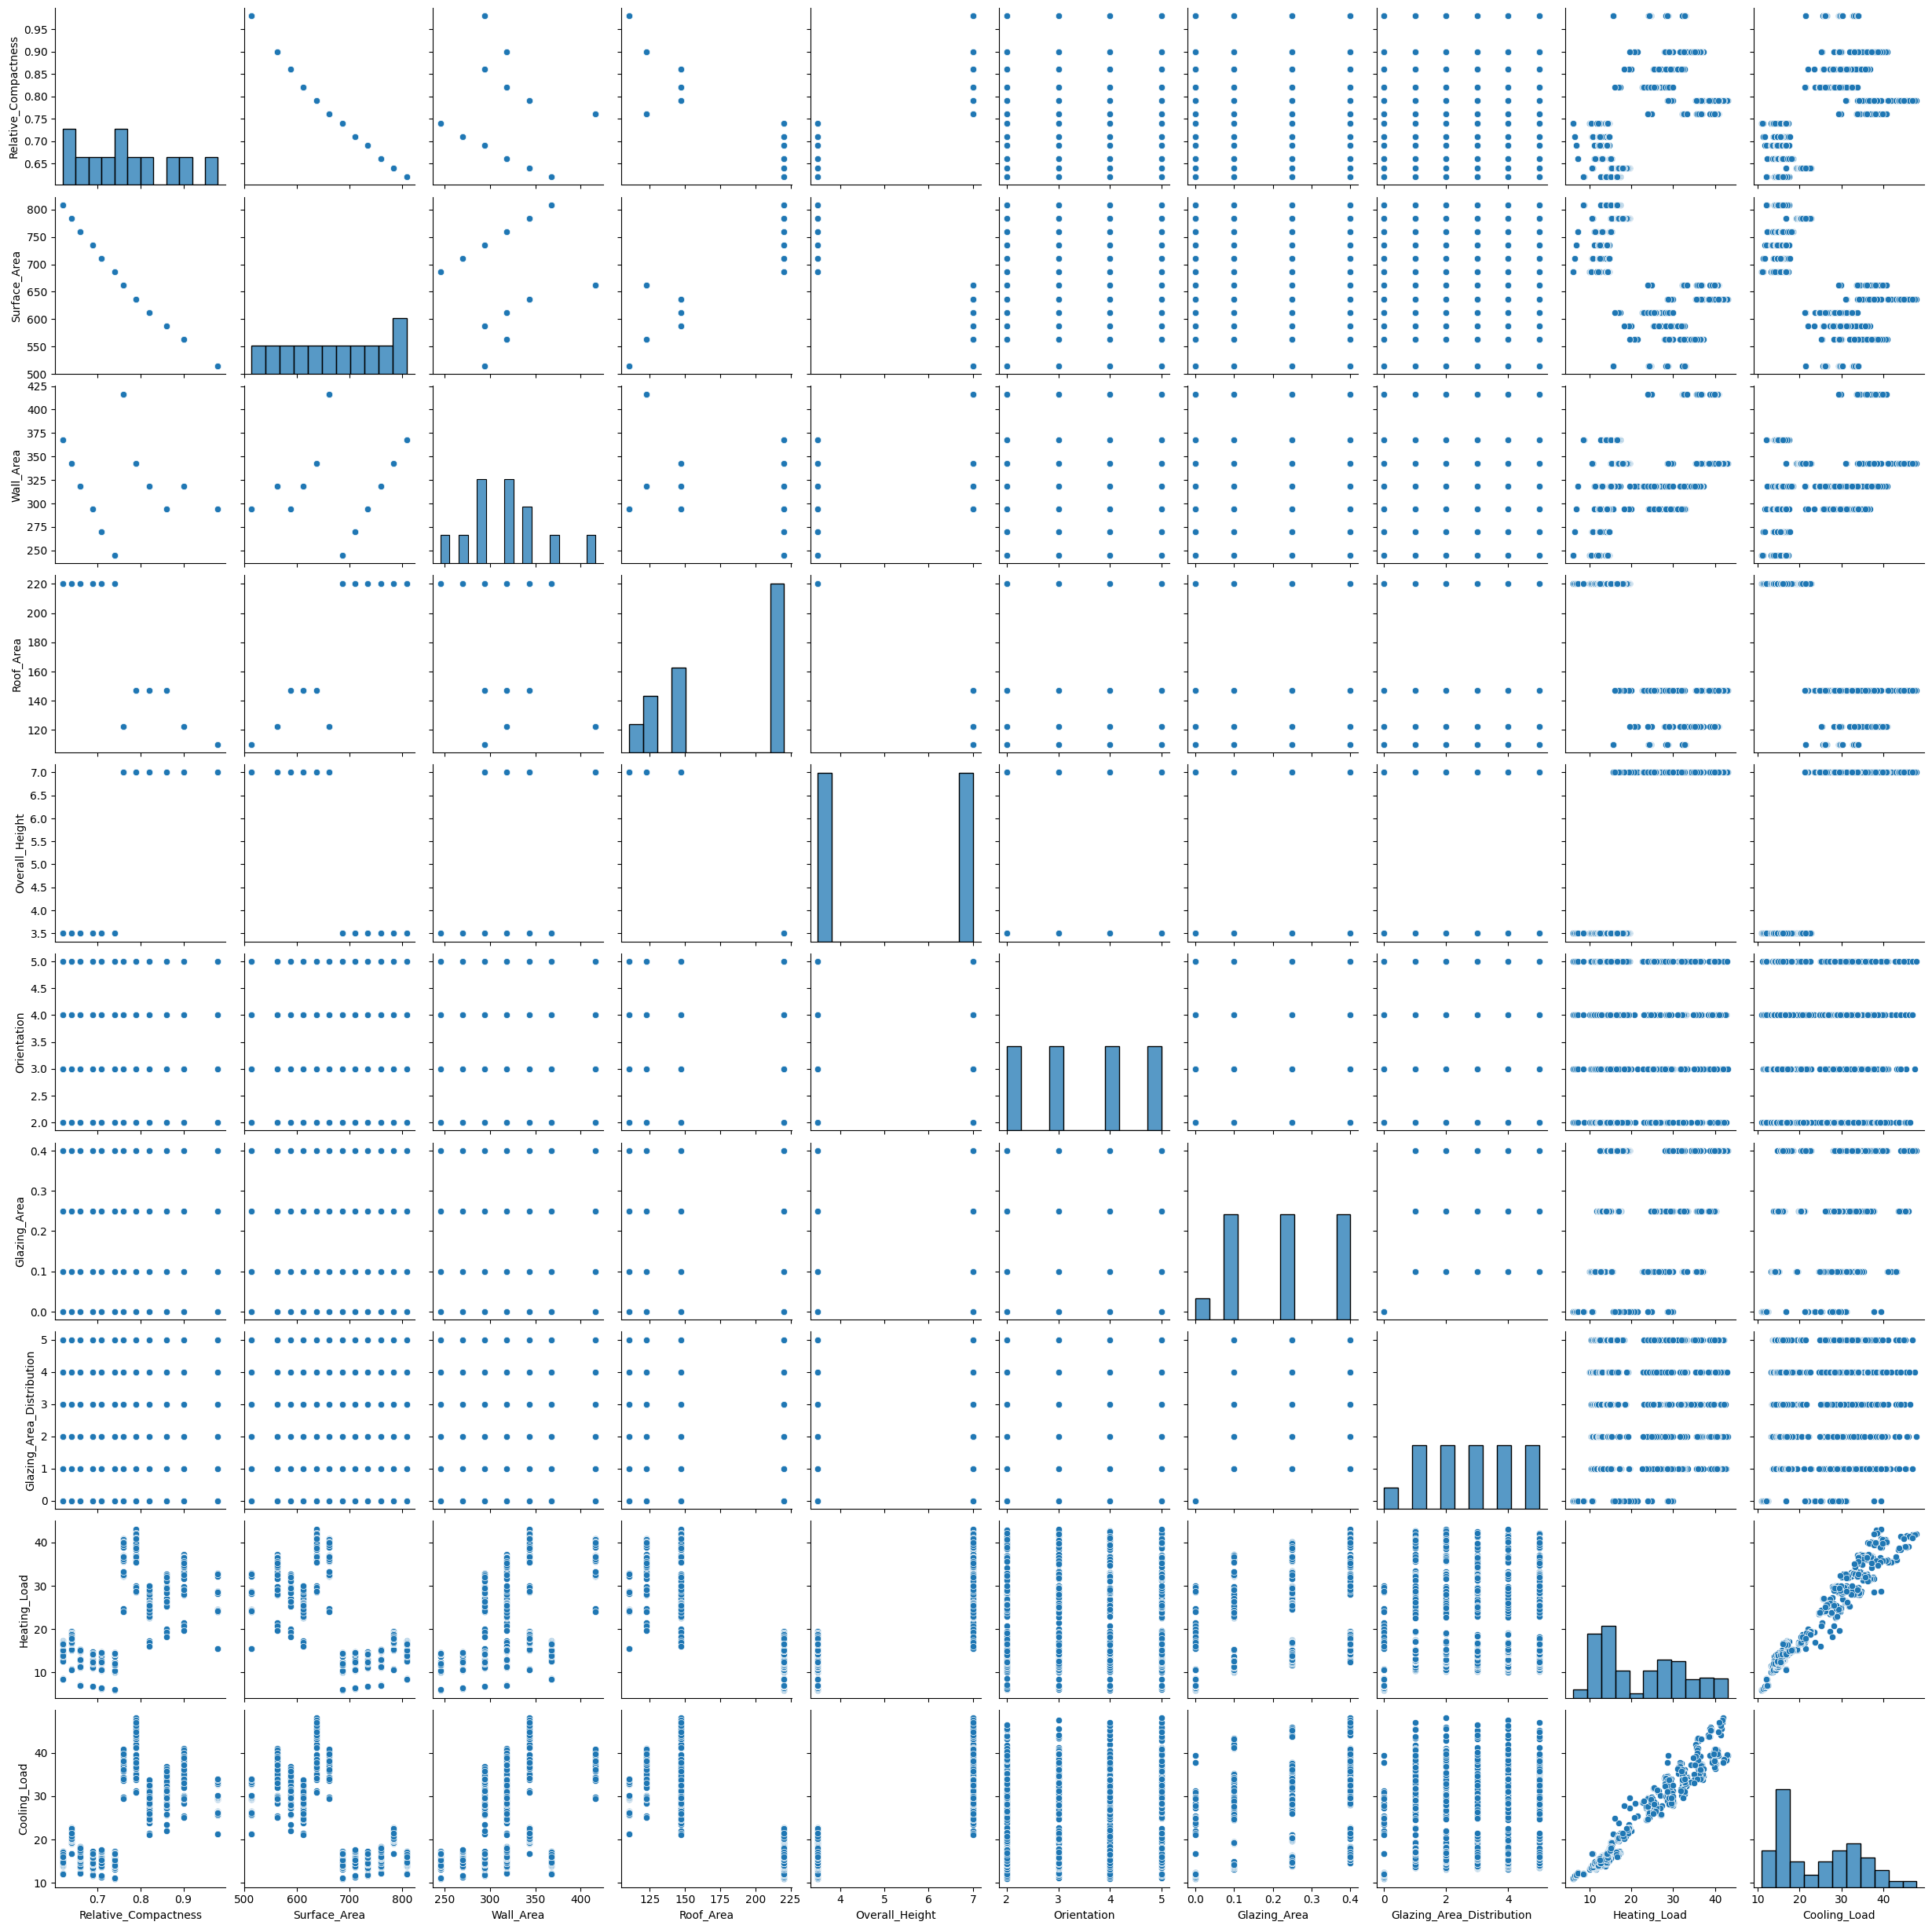

In [8]:
sns.pairplot(data_bef)

<Axes: >

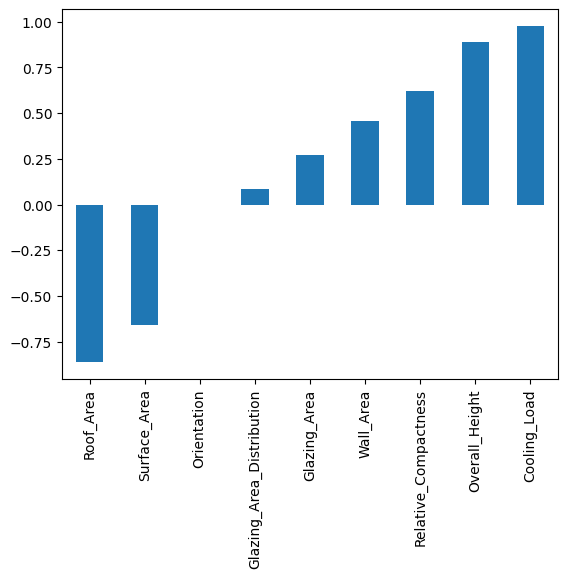

In [9]:
#### From this graph it can be easily observed that "Heating Load" and "Cooling Load" are highly correlated.
##### Both "Heating Load" and "Cooling Load" is correlated with Relative Compactness, Surface Area, Roof Area and Overall Height

data_bef.corr()['Heating_Load'].sort_values()[:-1].plot.bar()

<Axes: >

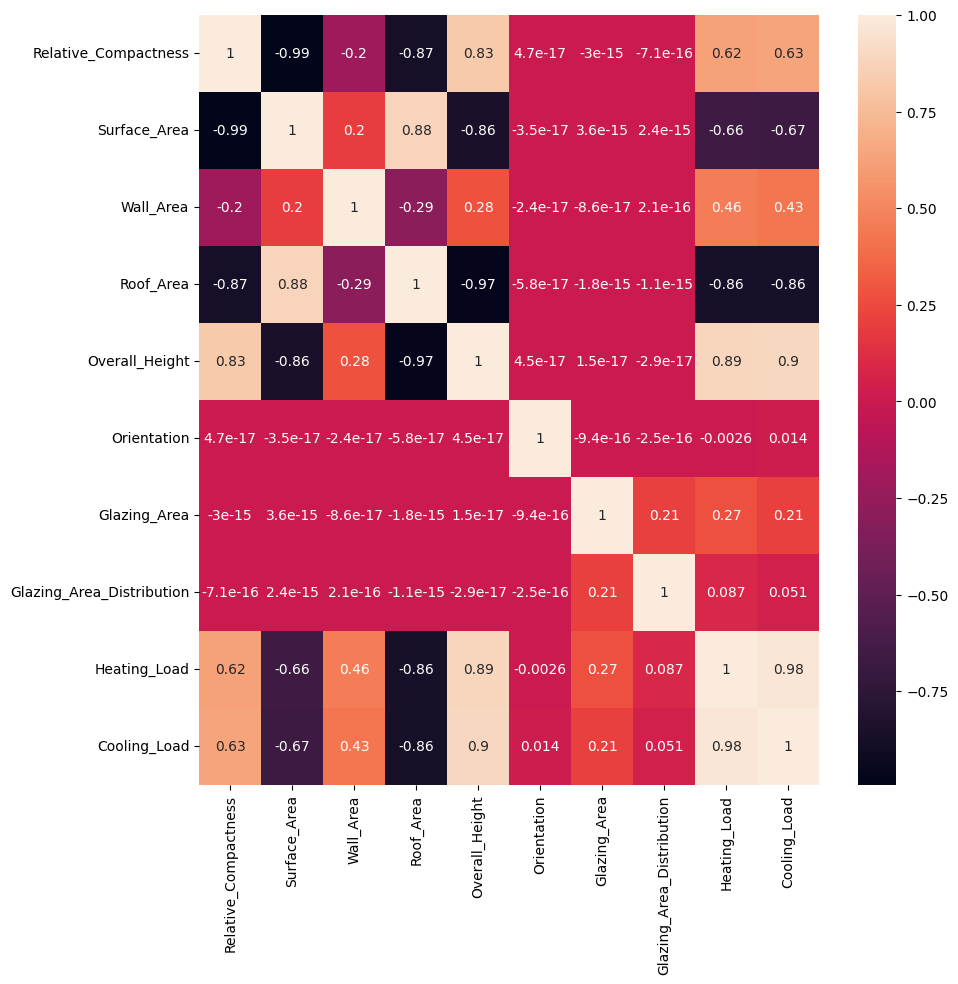

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data_bef.corr(), annot= True)

In [11]:
#this correlatioin heatmap shows that Realtive Comapctness is correlated to surface area 
#if we feed both to the model we would increase bias because they are repetition of each other.
#Same goes for Roof Area and Overall Height. So we will drop one of both. 

new_data_bef= data_bef.drop(['Relative_Compactness', 'Roof_Area'], axis= 1)

In [12]:
X= new_data_bef.drop(['Heating_Load','Cooling_Load'],axis=1)
y=new_data_bef[['Heating_Load', 'Cooling_Load']]
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size=0.3)

In [13]:
print(X_train)

     Surface_Area  Wall_Area  Overall_Height  Orientation  Glazing_Area  \
437         563.5      318.5             7.0          3.0          0.25   
443         588.0      294.0             7.0          5.0          0.25   
486         563.5      318.5             7.0          4.0          0.25   
577         514.5      294.0             7.0          3.0          0.40   
327         759.5      318.5             3.5          5.0          0.25   
..            ...        ...             ...          ...           ...   
15          612.5      318.5             7.0          5.0          0.00   
499         637.0      343.0             7.0          5.0          0.25   
372         759.5      318.5             3.5          2.0          0.25   
714         784.0      343.0             3.5          4.0          0.40   
428         808.5      367.5             3.5          2.0          0.25   

     Glazing_Area_Distribution  
437                        4.0  
443                        4.0  


In [35]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

models = [LinearRegression, ElasticNet, Lasso, DecisionTreeRegressor, RandomForestRegressor]
for model_class in models:
    model_name = model_class.__name__
    
    # Instantiate the model
    reg = model_class()
    
    # Fit the model
    reg.fit(X_train, y_train)
    
    # Make predictions
    pred = reg.predict(X_test)
    
    # Calculate RMSE
    err = np.sqrt(mean_squared_error(y_test, pred))
    
    # Calculate R2 score
    r2 = np.mean(r2_score(y_test, pred))
    
    # Use cross-validation for additional evaluation
    scores = cross_val_score(reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
# in cross validation greater the value of mean  is more accurate the model
    
    print(f'RMSE OF {model_name} model is {err}')
    print(f'R2 value of {model_name} is: {r2}')
    print("Mean:", scores.mean()) 
    print("Standard deviation:", scores.std())

RMSE OF LinearRegression model is 3.51137441472461
R2 value of LinearRegression is: 0.870227497832366
Mean: -9.18797500169944
Standard deviation: 2.263398604804302
RMSE OF ElasticNet model is 4.94702833696274
R2 value of ElasticNet is: 0.7433568850375788
Mean: -17.732413484540636
Standard deviation: 5.096082494657543
RMSE OF Lasso model is 5.084451389005697
R2 value of Lasso is: 0.7288999094119685
Mean: -18.753333886512028
Standard deviation: 5.4170599130673365
RMSE OF DecisionTreeRegressor model is 1.9953330288710944
R2 value of DecisionTreeRegressor is: 0.9570704123250291
Mean: -2.8116445999301187
Standard deviation: 1.4573531888399838
RMSE OF RandomForestRegressor model is 1.6606656747165622
R2 value of RandomForestRegressor is: 0.9702755486572783
Mean: -1.9441518417470305
Standard deviation: 0.9447939931298885


In [18]:

from sklearn.model_selection import cross_val_score